# Introduction
In this project we'll be building models that can predict the outcomes of whether or not a passenger in the titanic can survive or not base on other data provided

## Project Scope
We'll look at some of the information provided on this data...

Here are some questions that will be answered which will help us prepare the data for machine learning models
- Is the `Pclass` of a passenger a factor of survival?
- Are females more likely to survive than males?
- Are younger individuals more likely to survive?
- Is the cabin where an individual is a factor of survival?
- Is there a relationship between the cabin a passenger is and the place where he/she embarked?
- Are Fare price, cabin and place where a passenger embarked related?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# EDA

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that so far we got 3 columns that have missing data; `Cabin`, `Age` and `Embarked` with `Cabin` having the most missing data

In [6]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Missing data

In [8]:
# How many percent of our data is missing

total_missing = np.sum(train.isna().sum())
total_data = np.dot(train.shape[0], train.shape[1])

percent_missing = (total_missing) *100 / total_data
print(f"Percentage of missing data in training set {round(percent_missing, 2)}%")

Percentage of missing data in training set 8.1%


In [9]:
# For test set
total_missing = np.sum(test.isna().sum())
total_data = np.dot(test.shape[0], test.shape[1])

percent_missing = (total_missing) * 100 / total_data
print(f"Percentage of missing data testing {round(percent_missing, 2)}%")

Percentage of missing data testing 9.0%


### Age column
The age column seems to be missing 177 values, giving the circumstances in which the data was collected we can say that the data we missing at random (MAR) i.e there may be some reason as to why it's missing. Now the real question, should we drop the missing data or impute the values? The best approach is to impute the missing values using some strategies.

In [10]:
train_missing = train.Age.isna().sum() *100/ len(train)
test_missing = test.Age.isna().sum() / len(test)

print("Missing data in training set Age Feature:", round(train_missing, 2))
print("Missing data in testing set Age Feature:", round(test_missing, 2))
# About 20% of the ages are missing

Missing data in training set Age Feature: 19.87
Missing data in testing set Age Feature: 0.21


In [11]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Let's fill in our missing data with respect to the `Pclass` feature by getting the mean age for each class and imputing it.

In [12]:

def impute_age_missing(df):
    version1_list = []

    for class_ in df.Pclass.unique():
        data = df.Age[df.Pclass == class_]
        data = data.fillna(data.mean())
        for value in zip(data.index, data):
            version1_list.append(value)
    return version1_list

new_age = pd.DataFrame(impute_age_missing(train), columns=["index", "Age"]).\
sort_values(by="index", ascending=True).set_index("index")

In [13]:
train['Age'] = new_age
train.Age.head(10)

0    22.00000
1    38.00000
2    26.00000
3    35.00000
4    35.00000
5    25.14062
6    54.00000
7     2.00000
8    27.00000
9    14.00000
Name: Age, dtype: float64

In [14]:
new_age = pd.DataFrame(impute_age_missing(test), columns=["index", "Age"]).\
    sort_values(by="index", ascending=True).\
    set_index("index")
test['Age'] = new_age

We're now done with the `Age` feature now remaining the `Cabin` and `Embarked` features

### Embarked Feature

In [15]:
train.Embarked.isna().sum()


2

The `Embarked` columns seems to have only 2 missing values for which we can say they're missing completely at random maybe due to some mistake or some other unknown factor. In this case well just use a simple imputer to replace the missing values with the most frequent since it's a categorical variable. 

In [16]:
from sklearn.impute import SimpleImputer as SI

# initialize the simple imputer
imputer = SI(strategy="most_frequent")

# convert our data to 2-d array
embarked = train[['Embarked']]

imputed_embarked = imputer.fit_transform(embarked)

train['Embarked'] = imputed_embarked

train.Embarked.isna().sum()

0

### Cabin
Now for the `Cabin` feature; <br>
this feature seems a bit more complicated to impute as compared to the rest of the features. We can't impute it without first performing some EDA and data cleaning so let's start by first figuring out how much data is missing.

In [17]:
train_cabin = train.Cabin.isna().sum()
print("Missing data in the training set:", np.round(train_cabin * 100/len(train), 2), "%")

test_cabin = test.Cabin.isna().sum()
print("Missing data in the testing set:", np.round(test_cabin * 100/len(test), 2), "%")

Missing data in the training set: 77.1 %
Missing data in the testing set: 78.23 %


Seems that about 77% of the data is missing in the training set and about 78% in the testing set, so was it missing completely at random (MCAR)? Or was it just Missing At Random (MAR)? Well it's safer to assume that the data was missing at random i.e. it's missing for an unknown reason, but before we go on imputing the values let's first clean the columns

In [18]:
train['Deck'] = train.Cabin[train.Cabin.notnull()].apply(lambda x: str(x)[0])
test['Deck'] = test.Cabin[test.Cabin.notnull()].apply(lambda x: str(x)[0])

train_counts = train.Deck.value_counts()
test_counts = test.Deck.value_counts()
{"Test":test_counts, "Train":train_counts}

{'Test': C    35
 B    18
 D    13
 E     9
 F     8
 A     7
 G     1
 Name: Deck, dtype: int64,
 'Train': C    59
 B    47
 D    33
 E    32
 A    15
 F    13
 G     4
 T     1
 Name: Deck, dtype: int64}

Looks cleaner now, so are the missing values part of these Decks? Or are they all part of a new Deck that isn't listed above? To answer this question we need to perform some EDA

In [19]:
train[train.Cabin.isna()].Pclass.value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

According to the internet the titanic has 10 decks but even in the internet only seven were mentioned (all the decks excluding T) and here we only got eight which has only one person in it. It would be better to aggrigate that the `T` deck with our new value that we're about to make.

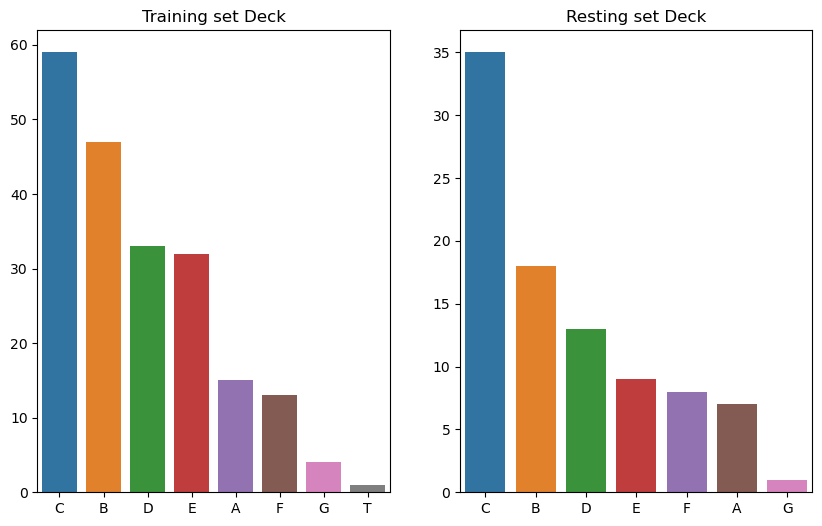

In [20]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
sns.barplot(x=train_counts.index, y=train_counts.values)
plt.title("Training set Deck")

plt.subplot(122)
sns.barplot(x=test_counts.index, y=test_counts.values)
plt.title("Resting set Deck")

plt.show()


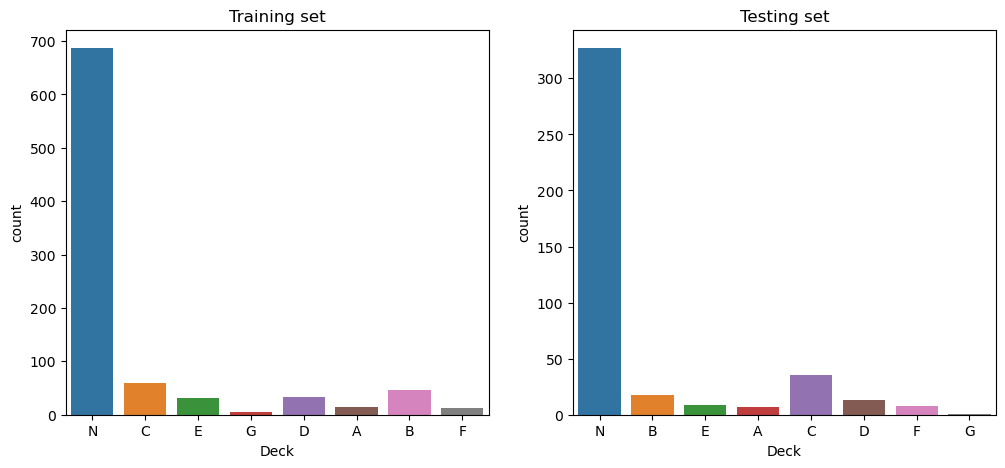

In [21]:
train.Deck.fillna("N")
new = train.Deck.replace("T", "G")

new = new.fillna("N")
train["Deck"] = new

test["Deck"] = test.Deck.fillna("N")

plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.countplot(data=train, x="Deck")
plt.title("Training set")

plt.subplot(122)
sns.countplot(data=test, x="Deck")
plt.title("Testing set")


plt.show()

## Exploring features

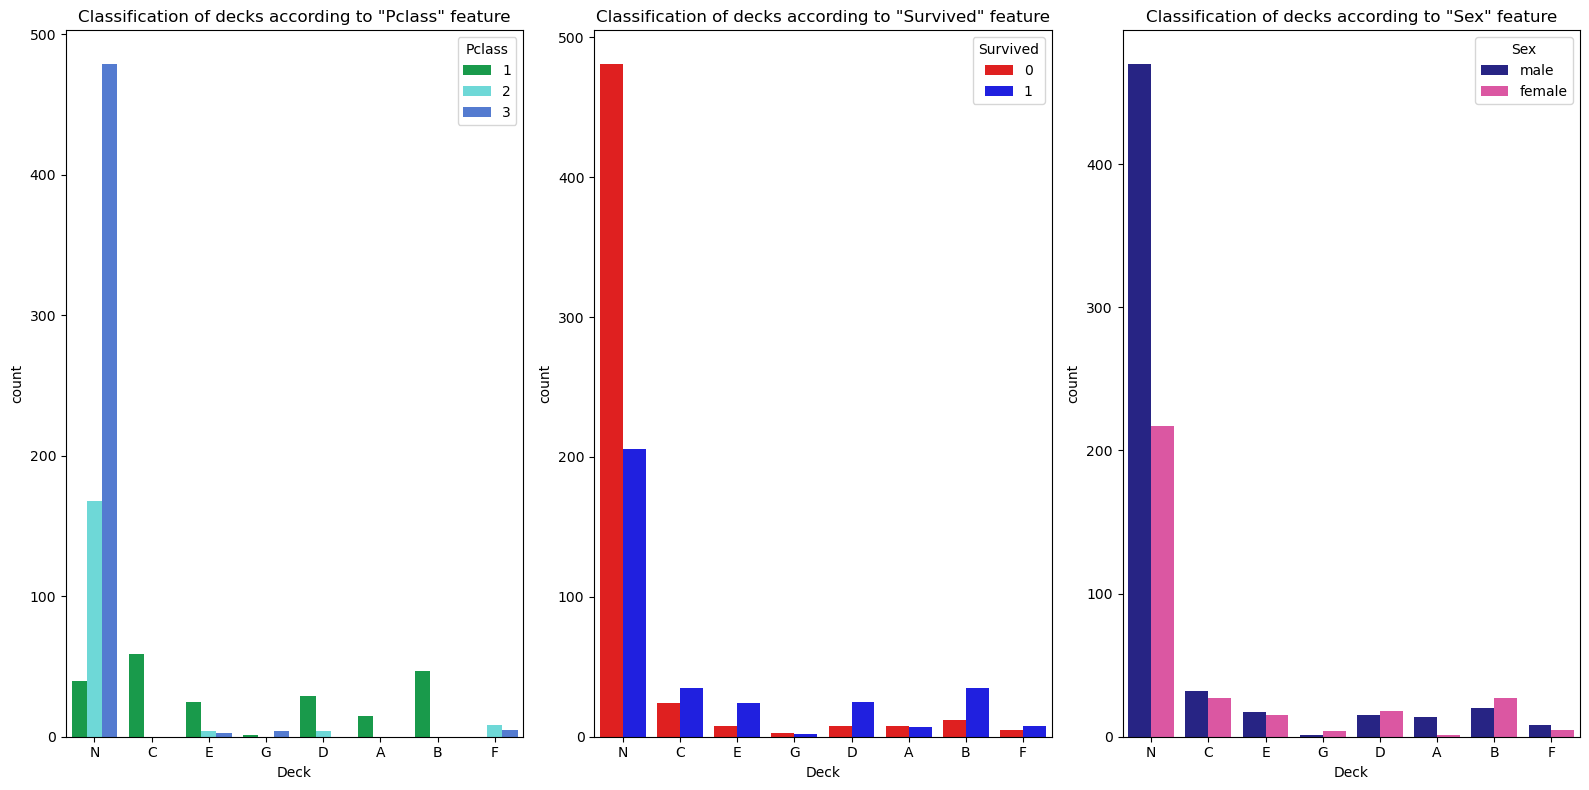

In [22]:
features = ['Pclass', "Survived", "Sex"]
# let's make our plot more descriptive
palette = [
    {1: "#04AF46", 2: "#5CEAE8", 3: "#3F73E5"},
    {0: "red", 1: "blue"},
    {"male": "#181494", "female": "#F141A5"},
]

plt.figure(figsize=(16, 8))
for i, feature in enumerate(features, start=1):
    ax = plt.subplot(1, 3, i)
    sns.countplot(data=train, x="Deck", hue=feature, palette=palette[i-1])
    plt.title(f"Classification of decks according to \"{feature}\" feature")
    
plt.tight_layout()
plt.show()

This graph is good when it comes to depicting how many people are in each category, but it's a bit diffcult to read and understand, best option would be to plot a stacked bar chart so that we can know the proportion of each category in each deck

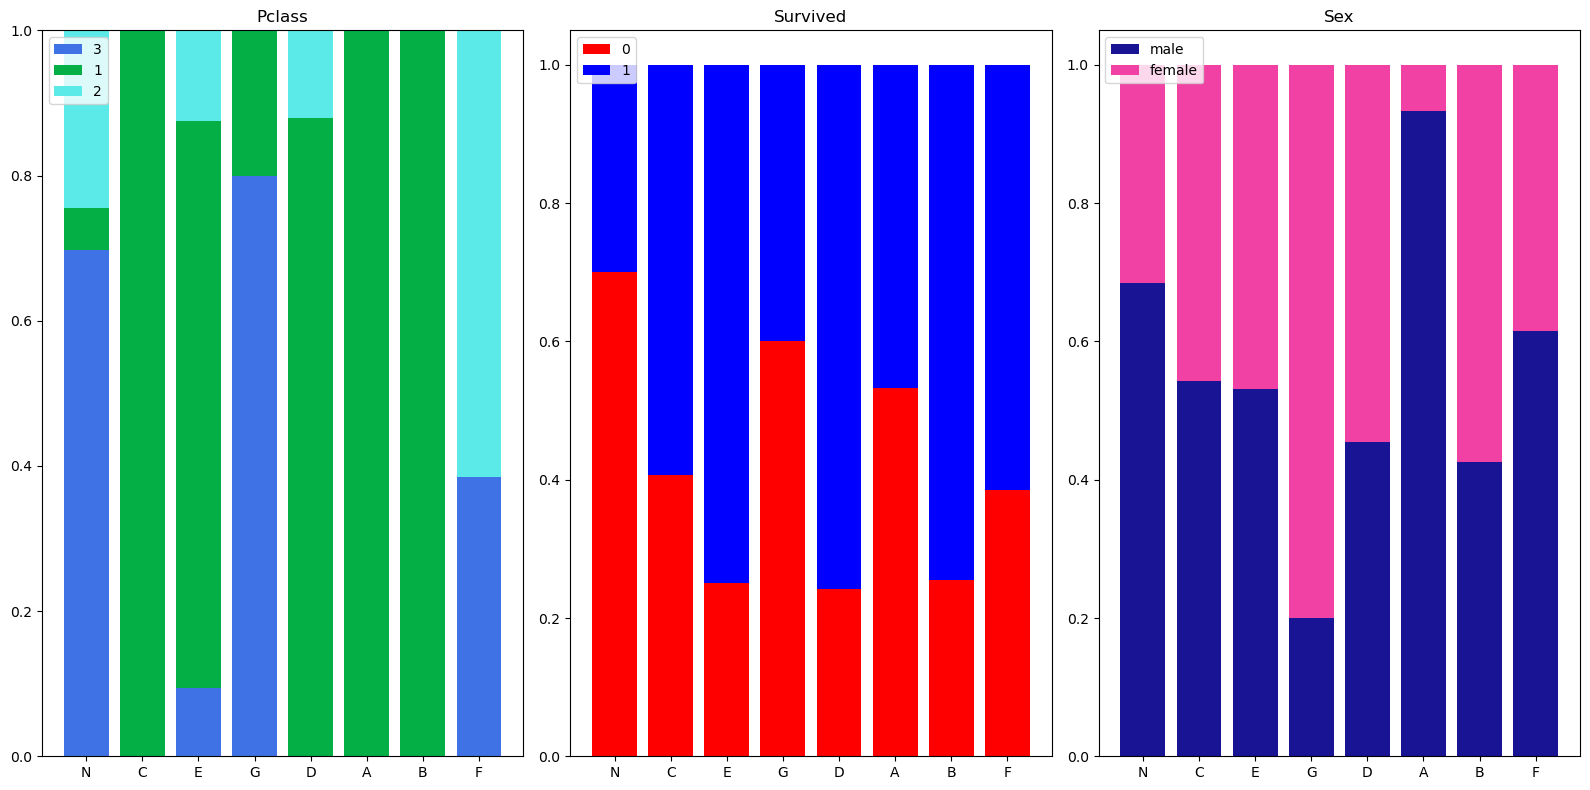

In [23]:
# Task: For each deck get the counts, and for each feature get the proportion of each category in each
# deck and plot a stacked bar chart to visualize.
decks = list(train.Deck.unique())
features = ['Pclass', "Survived", "Sex"]

plt.figure(figsize=(16, 8))
for i, feature in enumerate(features, start=1):
    plt.subplot(1, 3, i)
    len_unique = len(train[feature].unique())
    bottom = [0] * len(decks)

    for i2, values in enumerate(train[feature].unique()):
        index = train[feature].unique()[(i2)% len_unique]
        proportion = [
            train.Deck[(train.Deck == deck) & (train[feature] == index)].count()
            / len(train.Deck[train.Deck == deck]) 
            for deck in decks 
        ]
        plt.bar(decks, proportion, bottom=bottom, label=f"{values}", color=palette[i-1][values])
        bottom = np.array(bottom) + np.array(proportion)
    plt.title(str(feature))
    plt.legend(loc=2)

plt.tight_layout()
plt.show()

Now to start answering our questions:
Is `Pclass` a factor of survival?

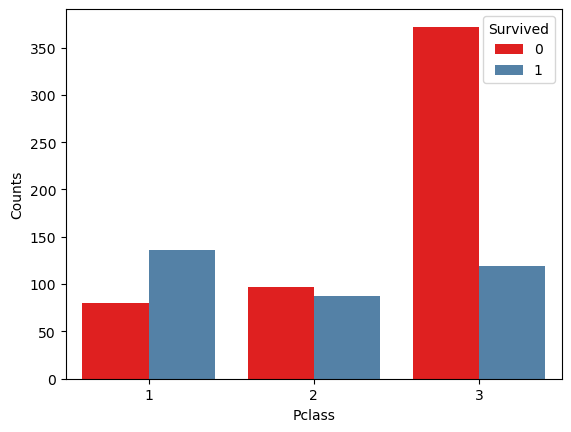

In [24]:
pclass_survived = train.groupby(["Pclass", "Survived"]).PassengerId.count().reset_index()
pclass_survived = pclass_survived.rename(columns={'PassengerId':"Counts"})
sns.barplot(pclass_survived, x="Pclass", y="Counts", hue="Survived", palette={0:"red", 1:"steelblue"})
plt.show()

In [25]:
pclass_survived

,Pclass,Survived,Counts
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


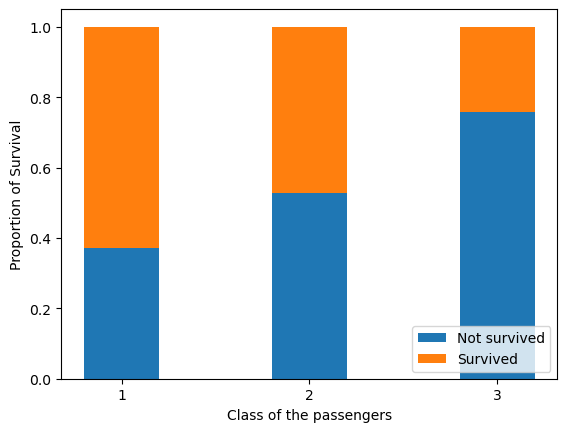

In [26]:
# Let's do a stacked bar chart like we did earlier

def plot_stacked_chart(df: pd.DataFrame, x: str, class_: str, value_col: str, xlabel, ylabel, legend_func):

    unique_class = df[x].unique()
    unique_x = df[class_].unique()
    bottom = [0] * len(unique_class)

    for sur in unique_x:
        prob = [
            df[value_col][(df[class_] == sur) & (df[x] == j)].sum() 
            / df[value_col][df[x] == j].sum()
            for j in unique_class
            ]
        x_values = list(range(1, len(unique_class)+1))

        plt.bar(
            x_values,
            prob,
            bottom=bottom,
            label=legend_func(sur),
            width=0.4
        )
        bottom = np.array(prob) + np.array(bottom)

    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(loc=4)
    plt.xticks(x_values, unique_class)
    plt.show()

label = lambda x: "Survived" if x == 1 else "Not survived"
plot_stacked_chart(pclass_survived, "Pclass", "Survived", "Counts", "Class of the passengers", "Proportion of Survival", label)
plt.show()

From the above chart we can see that passengers of first class tend to survive more compared to second class and second class tend to survive more compared to third class. Let's take a look at the proportion of survival for the classes then test just how related the `Pclass` variable is with the target

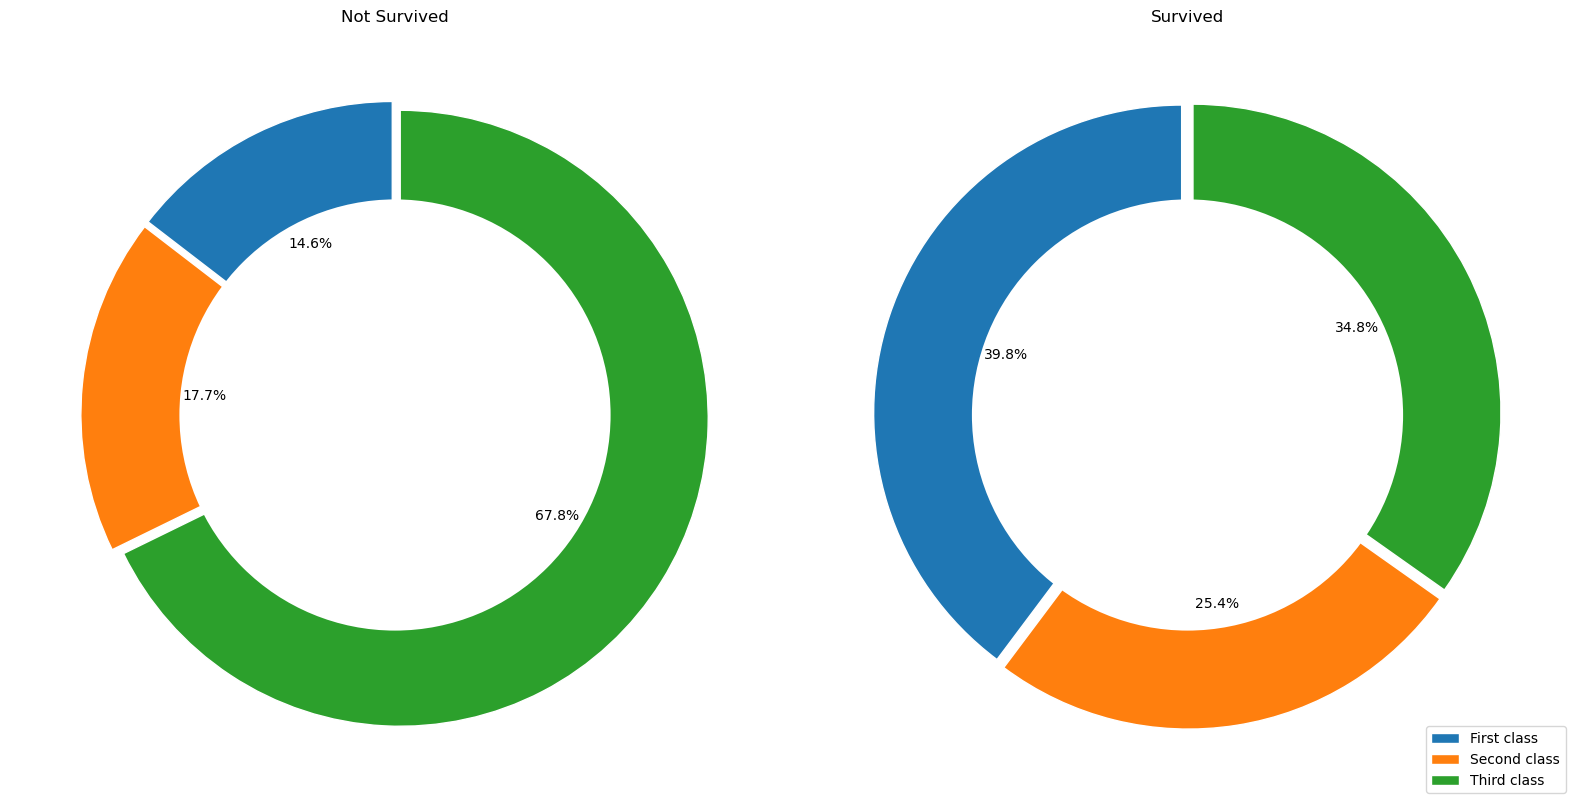

In [27]:
plt.figure(figsize=(16, 8))
unique_survived = train.Survived.unique()

for col in unique_survived:
    plt.subplot(1, 2, col+1)
    plt.pie(
        train.Pclass[train.Survived == col].value_counts().reset_index().sort_values(by="index", ascending=True).Pclass,
        explode=[0.02] * 3,
        autopct="%0.1f%%",
        wedgeprops={"edgecolor": "white"},
        startangle=90,
        
    )
    label = lambda x: "Survived" if x == 1 else "Not Survived"
    plt.title(label(col))
    fig = plt.gcf()
    circle = plt.Circle((0, 0), 0.7, fc="white")
    fig.gca().add_artist(circle)


plt.legend(["First class", "Second class", "Third class"], loc=4)
plt.tight_layout()
plt.show()

## Hypothesis Testing/ Feature Engineering

In [28]:
from scipy.stats import chi2_contingency

Xtab = pd.crosstab(train.Pclass, train.Survived)

dist, prob, dop, expected = chi2_contingency(Xtab)

prob

4.549251711298793e-23

As suspected we see that the probabily of them beign independent is approximately 4.5x10^-23 which is very small we might as well say that it's 0

Are feamles more likely to survive than males?

In [29]:
gender_survived = train.groupby(["Sex", "Survived"]).PassengerId.count().reset_index()
gender_survived = gender_survived.rename(columns={"PassengerId": "Counts"})
gender_survived

,Sex,Survived,Counts
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


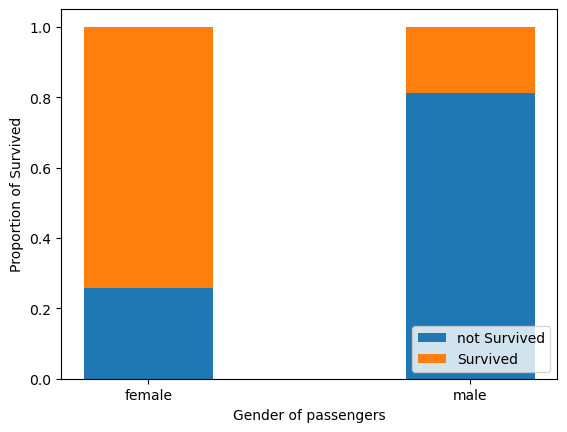

In [30]:
# Let's do a stacked bar chart like we did earlier

label = lambda x: "Survived" if x == 1 else "not Survived"

plot_stacked_chart(gender_survived, "Sex", "Survived", "Counts",
                    xlabel="Gender of passengers", ylabel="Proportion of Survived",
                    legend_func=label)

From the looks of it 80% of males didn't survive and 80% of female survived, now that's interesting.

In [31]:
crosstab = pd.crosstab(train.Sex, train.Survived)

dist, prob, dof, expected = chi2_contingency(crosstab)
prob
# Highly related

1.1973570627755645e-58

Are younger individuals more likely to survive? <br>
To answer this question we need to divide the `Age` feature into categories to allow us and our machine learning model to see the realtionship better. For this we'll divide it into 4 categories:
- Children: from age 0 - 12
- Teens: from age 13 - 19
- Adults: from age 20 - 50
- Elderly: from age 51 and above

So before we begin let's determine the Oldest and Youngest ages

In [32]:
print("Train oldest age:", train.Age.max(), "Youngest age:", train.Age.min())
print("Test Oldest age:", test.Age.max(), "Youngest age:", test.Age.min())

Train oldest age: 80.0 Youngest age: 0.42
Test Oldest age: 76.0 Youngest age: 0.17


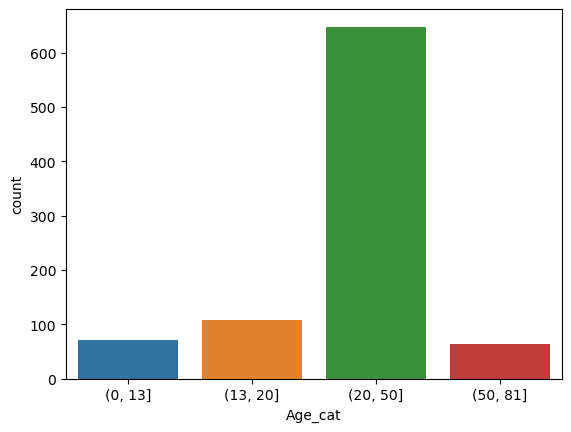

In [33]:
train['Age_cat'] = pd.cut(train.Age, bins=[0, 13, 20, 50, 81])
test['Age_cat'] = pd.cut(test.Age, bins=[0, 13, 20, 50, 81])

sns.countplot(train, x="Age_cat")
plt.show()

In [34]:
age_survived = train.groupby(['Age_cat', "Survived"]).PassengerId.count().reset_index()
age_survived = age_survived.rename(columns={"PassengerId": "Counts"})
age_survived

,Age_cat,Survived,Counts
0,"(0, 13]",0,29
1,"(0, 13]",1,42
2,"(13, 20]",0,68
3,"(13, 20]",1,40
4,"(20, 50]",0,410
5,"(20, 50]",1,238
6,"(50, 81]",0,42
7,"(50, 81]",1,22


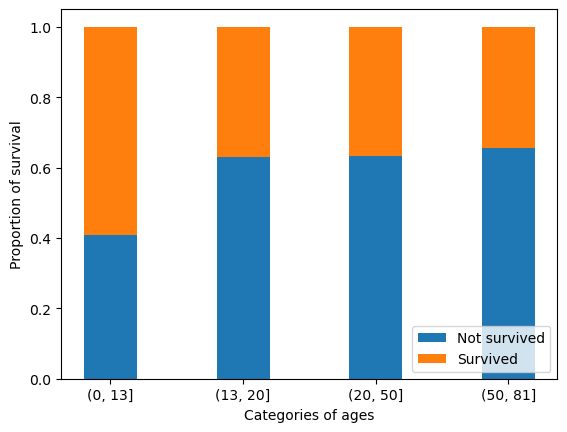

In [35]:
label = lambda x: "Survived" if x == 1 else "Not survived"

plot_stacked_chart(age_survived, "Age_cat", "Survived", "Counts",
                    xlabel="Categories of ages", ylabel="Proportion of survival",
                    legend_func=label)

In [36]:
# For our machine learning model to better understand
train["Age_cat"] = train.Age_cat.cat.codes
test["Age_cat"] = test.Age_cat.cat.codes

We can see from the plot that children are more likely to survive compared to the rest, and the other categories have almost the same proportion of survived individuals.<br>
Just how independent is the `Age_cat` feature from the `Survived` feature?

In [37]:
Xtab = pd.crosstab(train.Survived, train.Age_cat)

dist, prob, dof, expected = chi2_contingency(Xtab)
prob

# The probability of independence is just 0.2% meaning the're realted

0.002619883739195097

In [38]:
from string import digits

train["Tickets"] = train.Ticket.str[0].apply(lambda x: "D" if x in digits else x)
test["Tickets"] = test.Ticket.str[0].apply(lambda x: "D" if x in digits else x)

train.Tickets.unique()

array(['A', 'P', 'S', 'D', 'C', 'W', 'F', 'L'], dtype=object)

In [39]:
# Now we want to test if the "Ticket" feature has a relationship with the target feature

xtab = pd.crosstab(train.Tickets, train.Survived)
xtab

Survived,0,1
Tickets,,
A,27,2
C,31,16
D,407,254
F,3,4
L,3,1
P,23,42
S,44,21
W,11,2


In [40]:
dist, prob, dof, expected = chi2_contingency(xtab)

prob
# 5.32300e-6
# Highly dependent
significance_test = lambda x: "Significant" if x < 0.05 else "Not Significant"

significance_test(prob)

'Significant'

In [41]:
train[train.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Age_cat,Tickets
179,180,0,3,"Leonard, Mr. Lionel",male,36.000000,0,0,LINE,0.0,NaN,S,N,2,L
263,264,0,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0,B94,S,B,2,D
271,272,1,3,"Tornquist, Mr. William Henry",male,25.000000,0,0,LINE,0.0,NaN,S,N,2,L
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,29.877630,0,0,239853,0.0,NaN,S,N,2,D
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.000000,0,0,LINE,0.0,NaN,S,N,1,L
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,29.877630,0,0,239853,0.0,NaN,S,N,2,D
466,467,0,2,"Campbell, Mr. William",male,29.877630,0,0,239853,0.0,NaN,S,N,2,D
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,29.877630,0,0,239854,0.0,NaN,S,N,2,D
597,598,0,3,"Johnson, Mr. Alfred",male,49.000000,0,0,LINE,0.0,NaN,S,N,2,L
633,634,0,1,"Parr, Mr. William Henry Marsh",male,38.233441,0,0,112052,0.0,NaN,S,N,2,D


We notice that some of the fare prices are 0 but why? Well it turns out -after some research- that those with fare price of 0 are the ship's crew and **none of the ship's crew have survived** because they were trying to keep the ship warm and powered up so they didn't have a chance to escape. 

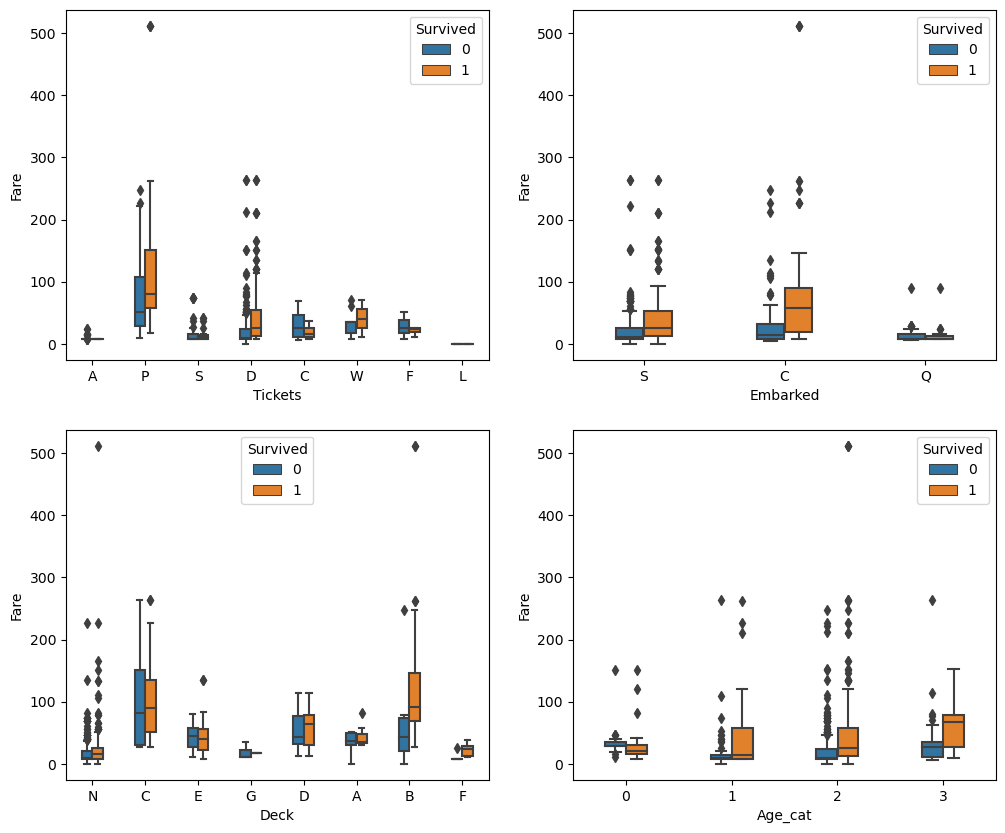

In [42]:
# Fare
features = ["Tickets", "Embarked", "Deck", "Age_cat"]

plt.figure(figsize=(12, 10))

for i, col in enumerate(features, start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train[col], y=train.Fare, hue=train.Survived, width=0.4)


plt.show()

We can see that in general those with higher fare price tend to survive that those with lower fare price

In [43]:
import re
# Next is the "Name" Feature


def filter_title(x):
    compiler = re.compile(r"\w+\.")

    result = compiler.findall(x)

    return "".join(result)

train['Title'] = train.Name.apply(filter_title)
counts = train.Title.value_counts()
ones = counts.index[counts <= 10]

train[np.isin(train.Title, ones)]
# np.where(train.Title.any() in ones, train, "Other ones")
train.loc[train.Title.apply(lambda x: x in ones), "Title"] = "Others"

In [44]:
test["Title"] = test.Name.apply(filter_title)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Age_cat,Tickets,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,N,2,D,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,N,2,D,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,N,3,D,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,N,2,D,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,N,2,D,Mrs.


In [45]:
train.Tickets.value_counts()
# 'A', 'W', 'F', 'L'
train[train.Tickets == 'F']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck,Age_cat,Tickets,Title
154,155,0,3,"Olsen, Mr. Ole Martin",male,25.14062,0,0,Fa 265302,7.3125,NaN,S,N,2,F,Mr.
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.00000,0,0,F.C.C. 13528,21.0000,NaN,S,N,2,F,Miss.
314,315,0,2,"Hart, Mr. Benjamin",male,43.00000,1,1,F.C.C. 13529,26.2500,NaN,S,N,2,F,Mr.
440,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.00000,1,1,F.C.C. 13529,26.2500,NaN,S,N,2,F,Mrs.
458,459,1,2,"Toomey, Miss. Ellen",female,50.00000,0,0,F.C.C. 13531,10.5000,NaN,S,N,2,F,Miss.
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.00000,0,2,F.C.C. 13529,26.2500,NaN,S,N,0,F,Miss.
671,672,0,1,"Davidson, Mr. Thornton",male,31.00000,1,0,F.C. 12750,52.0000,B71,S,B,2,F,Mr.


In [46]:
train['Family'] = train.Parch + train.SibSp
test['Family'] = test.Parch + test.SibSp

# Machine Learning

In [52]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer as CT
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from category_encoders import BinaryEncoder

In [53]:
# copy the data frame
input_set = train.copy()

# list of columns to be dropped
drop_cols = ["PassengerId", "Name", "Cabin", "Ticket", "Age", "Parch", "SibSp"]

# drop the cols
input_set.drop(columns=drop_cols, inplace=True)

# select categorical columns to One hot encode
ohe_cols = [col for col in input_set.columns if (input_set[col].dtype == "object") and (input_set[col].nunique() <= 5)]
binary_en_cols = [col for col in input_set.columns if (input_set[col].dtype == "object") and (input_set[col].nunique() > 5)]
binary_en_cols, ohe_cols


(['Deck', 'Tickets'], ['Sex', 'Embarked', 'Title'])

In [54]:
# Perform some one hot encoding
OneHot = OneHotEncoder(handle_unknown="ignore", sparse=False)
# fit and transform the data
sex_embark = OneHot.fit_transform(train[ohe_cols])
# Change it into a data frame
sex_embark = pd.DataFrame(sex_embark)


In [105]:
# Perform binary enoding
Binary = BinaryEncoder(cols=binary_en_cols)
Binary.fit_transform(input_set)

,Survived,Pclass,Sex,Fare,Embarked,Deck_0,Deck_1,Deck_2,Deck_3,Age_cat,Tickets_0,Tickets_1,Tickets_2,Tickets_3,Title,Family
0,0,3,male,7.2500,S,0,0,0,1,2,0,0,0,1,Mr.,1
1,1,1,female,71.2833,C,0,0,1,0,2,0,0,1,0,Mrs.,1
2,1,3,female,7.9250,S,0,0,0,1,2,0,0,1,1,Miss.,0
3,1,1,female,53.1000,S,0,0,1,0,2,0,1,0,0,Mrs.,1
4,0,3,male,8.0500,S,0,0,0,1,2,0,1,0,0,Mr.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,13.0000,S,0,0,0,1,2,0,1,0,0,Others,0
887,1,1,female,30.0000,S,0,1,1,1,1,0,1,0,0,Miss.,0
888,0,3,female,23.4500,S,0,0,0,1,2,0,1,1,0,Miss.,3
889,1,1,male,30.0000,C,0,0,1,0,2,0,1,0,0,Mr.,0


In [106]:
model_tree = DecisionTreeClassifier(random_state=1, max_leaf_nodes=20)
model_boost = XGBClassifier()

In [107]:

transformer = CT(transformers=[
    ("One Hot Encoding", OneHotEncoder(handle_unknown="ignore"), ohe_cols),
    ("Scaler", StandardScaler(), ['Fare']),
    ("Ordinal Encoder", OrdinalEncoder(), ['Sex'])
])

pipline = Pipeline(steps=[
    ("Binary Encoding", Binary),
    ("Column Transforms", transformer)
])


In [108]:

tree_pipe = Pipeline(steps=[
    ("Preprocessing", pipline),
    ("Model", model_tree)
])

boost_pipe = Pipeline(steps=[
    ("Preprocessing", pipline),
    ("Model", model_boost)
])

In [109]:
from sklearn.metrics import accuracy_score

X = input_set.drop(columns=['Survived'])
y = input_set['Survived']

x_train, x_test, y_train, y_test = tts(X, y, test_size=0.3)

model = tree_pipe.fit(x_train, y_train)

prediction = tree_pipe.predict(x_test)
prediction

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0], dtype=int64)

In [110]:
accuracy_score(y_test, prediction)

0.7910447761194029

In [111]:
# boost pipe

model = boost_pipe.fit(x_train, y_train)

prediction2 = boost_pipe.predict(x_test)
prediction2

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0])

In [112]:
accuracy_score(y_test, prediction2)

0.8283582089552238